<div class="alert alert-block alert-success">
<font color=blue>

## Credit Card Fraud Detection

#### (Identify fraudulent credit card transactions.)

#### 0. Overview
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

#### 1. Data Collection
- Import and load the dataset
- Use API if needed to collect data

#### 2. Data Exploration & Visualization
- Categorical and Contunuous variables : Identify, Descriptive Statistics
- Check missing values
- Draw visualizations
- Outlier detection
- Relationship between Dependent and Independent variables.
- Relationship among Dependent variables (Correlation matrix).

#### 3. Pre-processing
- Detect and remove null records.
- Detect and remove empty strings.
- Categorical to Numerical Variable conversion (Integer Encoding, One-hot encoding)
- Outlier Removal
- Stratified sampling
- Split data into train/test
- Stopword removal, Stemming, Lemmatization (NLP)

#### 4. Feature Engineering
- Feature Engineering (Create new features from existing variables)
- Feature Selection - Define Dependent Variable (y) and Independent Variable (x)
- Vectorization (TF-IDF)

#### 5. Model Building
- Import - Import the Model.
- Instantiate - Create instance of the Model.
- Fit - Fit the model with training data.
- Predict - Predict Model with test data.

#### 6. Model Evaluation
- Confusion Matrix
- Classification Report
- Accuracy Score
- AUC-ROC Curve

#### 7. Model Prediction with new Data
- Feed new data to the model and check prediction.

#### 8. Conclusion and Recommendations
- (Describe the conclusion and recommendation based on model analysis.)
    
</font>
</div>

# Table of Contents

1. **[Project Background](#1)**
2. **[Data Cleaning](#2)**
3. **[Exploratory Data Analysis](#3)**
4. **[Data Visualization](#4)**
5. **[Machine Learning: Classification](#5)**
6. **[Machine Learning: Regression](#6)**
7. **[Conclusion & Recommendations](#7)**

<div class="alert alert-block alert-success">
<font color=blue>

### 0. Overview

</font>
</div>

- It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
- 

<div class="alert alert-block alert-success">
<font color=blue>

### 1. Data Collection

</font>
</div>

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [41]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns # Python data visualization library
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [42]:
df_data = pd.read_csv('~/data/creditcard.csv')
df_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<div class="alert alert-block alert-success">
<font color=blue>

### 2. Data Exploration & Visualization

</font>
</div>

In [43]:
df_data.shape

(284807, 31)

There are 284807 Transaction records and 31 input variables.

### 2.1 : Missing Values Identification

In [44]:
# TOTAL count (non-null values)
sr_count_total = df_data.count()

# MISSING COUNT
sr_count_missing = df_data.isnull().sum()

# MISSING PERCENT
sr_percent_missing = round(df_data.isnull().sum() * 100 / len(df_data),2)

# Total count (non-null values)
df_missing_value = pd.DataFrame({'count_total': sr_count_total,
                                 'count_missing': sr_count_missing,
                                 'percent_missing': sr_percent_missing})

# Sort by the field "percent_missing" descending
df_missing_value.sort_values('percent_missing', ascending=False, inplace=True)

# print the dataframe
df_missing_value

,count_total,count_missing,percent_missing
Time,284807,0,0.0
V16,284807,0,0.0
Amount,284807,0,0.0
V28,284807,0,0.0
V27,284807,0,0.0
V26,284807,0,0.0
V25,284807,0,0.0
V24,284807,0,0.0
V23,284807,0,0.0
V22,284807,0,0.0


NO MISSING VALUES IN THE DATASET.

### 2.2 : Descriptive Statistics - Numerical Variables

In [45]:
df_data.describe() #.transpose()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- (TBD)

### 2.3 : Descriptive Statistics - Categorical Variables

In [46]:
df_data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

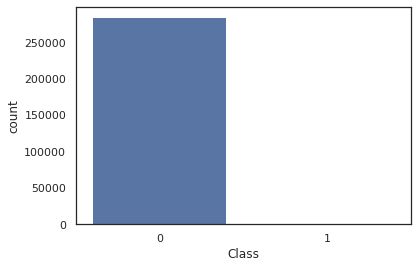

In [47]:
sns.countplot(x="Class", data=df_data);

Text(0.5, 1.0, 'Transaction Distribution : Valid(0) vs Fraudaulant(1)')

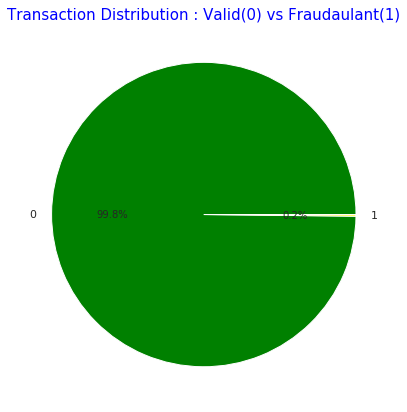

In [48]:
# Plot parameters
labels = df_data["Class"].value_counts().index
colors = ['green','yellow']
explode = [0,0]
sizes = df_data["Class"].value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Transaction Distribution : Valid(0) vs Fraudaulant(1)',color = 'blue',fontsize = 15)

Data is highly imbalanced.

### 2.4 : Correlation Matrix

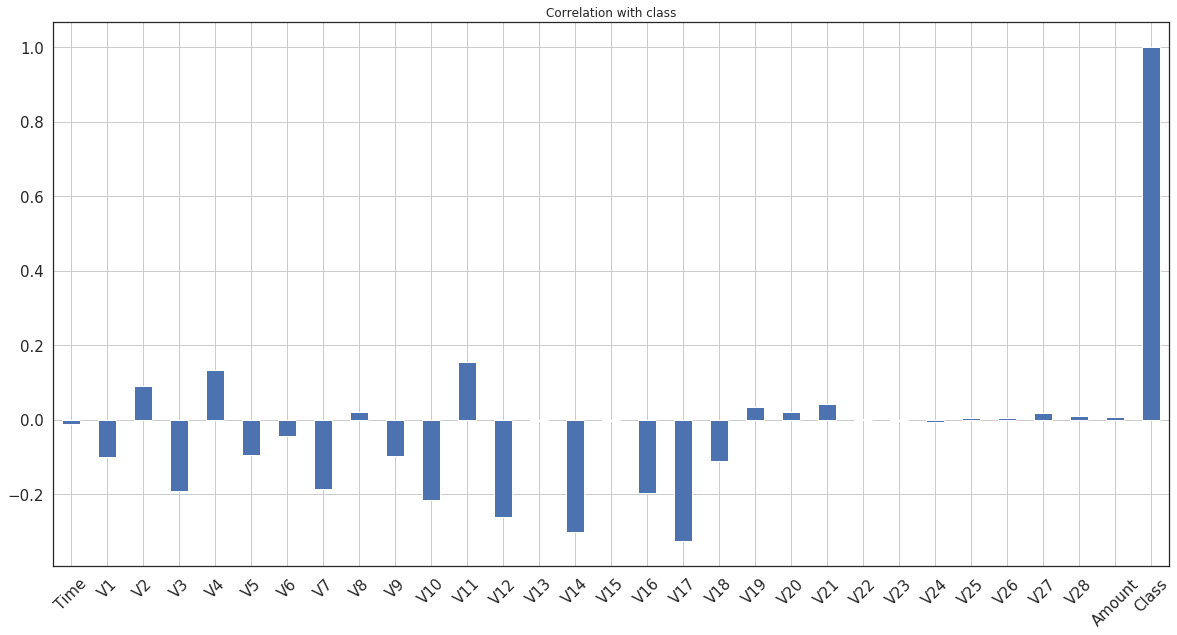

In [49]:
df_data.corrwith(df_data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

In [50]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df_data.corr()
corr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447


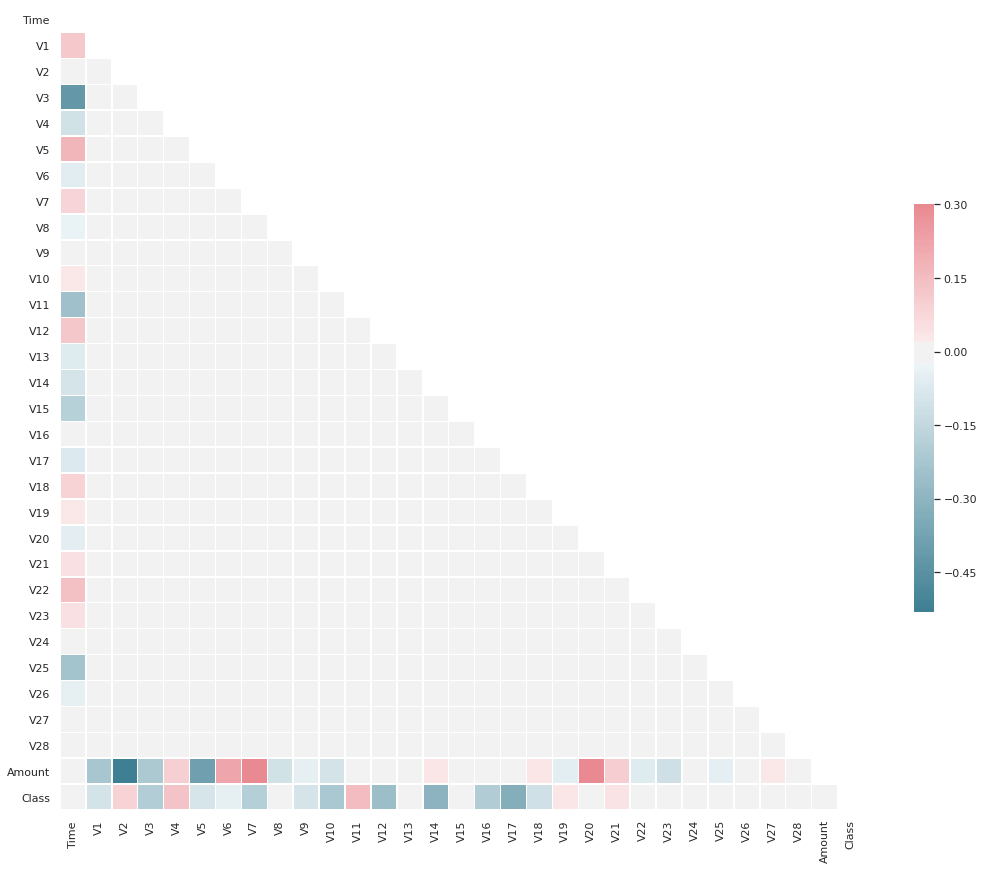

In [51]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<div class="alert alert-block alert-success">
<font color=blue>

### 3. Pre-processing

</font>
</div>

### 3.1 : Missing Value Fix

NO MISSING VALUES IN THE DATASET.

### 3.2 : Categorical to Numerical Variables

No categorical variables in the dataset.

<div class="alert alert-block alert-success">
<font color=blue>

### 4. Feature Engineering

</font>
</div>

#### Define Dependent Variable (y) and Independent Variable (x)

In [52]:
y = df_data['Class'] # We want to predict the response 
x = df_data.drop('Class',axis=1) #Excluding "Class", rest all are indepdent variables

<div class="alert alert-block alert-success">
<font color=blue>

### 5. Model Building

</font>
</div>

- Split data into Train/Test.

- Compare scores for Various Classification Algorithms:
    - Carry out K-Fold Cross validation with training data.
    - For each fold determine cross validation scores.
    - Finally get the mean score for each algorithm.
    - Pick the best performing algorithm.

- Build Model based on the best performing algorithm.

### 5.2 : Split into Train & Test data subsets

#### 5.2.1 : Random Split

In [53]:
from sklearn.model_selection import train_test_split;

In [54]:
# Reference - https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7
# test_size=0.2 => split data into train/test in 70:30 ratio.
# random_state=7 => it will take the same sample every time.

test_size= 0.20
seed = 6

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=seed)

In [55]:
print(y_train.value_counts())
print(y_test.value_counts())

0    227451
1       394
Name: Class, dtype: int64
0    56864
1       98
Name: Class, dtype: int64


#### 5.2.2 : Stratified Split (T B D)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=seed,stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())

0    227451
1       394
Name: Class, dtype: int64
0    56864
1       98
Name: Class, dtype: int64


In [57]:
from sklearn.model_selection import StratifiedShuffleSplit

In [58]:
test_size= 0.20
seed = 7
n_splits = 1

sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
sss.get_n_splits(x, y)

print(sss)       

for train_index, test_index in sss.split(x, y):
   print("TRAIN:", train_index, "TEST:", test_index)
   #x_train, x_test = x[train_index], x[test_index]
   #y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=1, random_state=7, test_size=0.2,
            train_size=None)
TRAIN: [128340   3889  62623 ...  20084  96704 177088] TEST: [165573 231249  92951 ... 132176 223988 244825]


In [59]:
print(x.iloc[32167])
print(y.iloc[32167])

Time      36668.000000
V1           -2.457486
V2            2.380633
V3           -1.539617
V4            2.583156
V5           -1.400639
V6           -0.822298
V7           -0.342460
V8            1.674187
V9           -2.016410
V10          -0.083033
V11          -1.491302
V12           0.166631
V13          -0.083466
V14           2.013079
V15           0.106009
V16           0.625828
V17           0.516406
V18          -0.018663
V19          -0.170872
V20          -0.844374
V21           0.397600
V22           0.445043
V23           0.311814
V24           0.383781
V25          -0.887943
V26          -0.105873
V27          -0.820086
V28          -0.254072
Amount       75.830000
Name: 32167, dtype: float64
0


### 5.3 : Compare Various Classification Algorithms

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [61]:
from sklearn.linear_model import LogisticRegression;
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [62]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [63]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=seed)    
    
    # train the model
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    
    names_c.append(name)
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(msg)

LR: 0.998991 (0.000176)
KNN: 0.998367 (0.000290)
CART: 0.999210 (0.000280)
NB: 0.993000 (0.000453)


Logistic regression algorithm has the best accuracy i.e 89% among all the classifiers evaluated above.

### 5.3 : Create Model

- Define and instantiate Logistic Regression Model.
- Fit the model with training data.
- Evaluate the model with test data.

In [72]:
# create an instance of logistic regression model
log_model = LogisticRegression()

# Fit model with training data
log_model.fit(x_train,y_train)

# Make prediction with test data as input. Output will be 1/0
y_predicted = log_model.predict(x_test)

<div class="alert alert-block alert-success">
<font color=blue>

### 6. Model Evaluation

</font>
</div>

In [65]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 6.1 : Accuracy Score

In [66]:
accuracy_score(y_test, y_predicted)

0.9986833327481479

Accuracy score is the percentage of correct predictions out of all predictions made. 
The LR algorithm achieves an accuracy of 90.5%, suggesting high level of strength of this model to classify the customer response given all the defined customer features.

### 6.2 : Confusion Matrix

In [67]:
confusion_matrix(y_test, y_predicted)

array([[56832,    32],
       [   43,    55]])

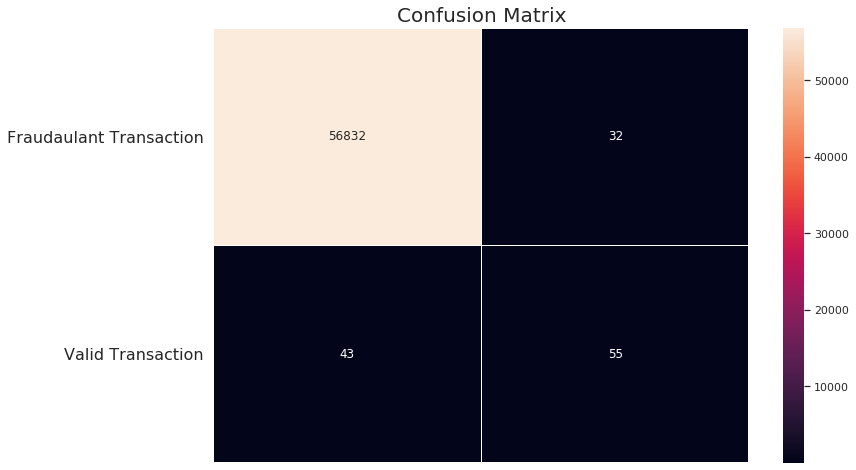

In [69]:
conf_matrix = confusion_matrix(y_test, y_predicted)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Fraudaulant Transaction', 'Valid Transaction'], fontsize=16, rotation=360)
plt.show()

**Positive** => 0 => Refused Term Deposits  
**Negative** => 1 => Accepted Term Deposits  

**True  Positive (TP)** => 7830  
**False Positive (FP)** => 197  

The model predicted 7830 CORRECTLY (Refused T. Deposits) and only 197 FALSELY predicted as Positive(0), which is not bad.  

**False Negative (FN)** => 661  
**True  Negative (TN)** => 335  

The model predicted 661 FALSELY as (1 - Accepted T. Deposits) and only 335 CORRECTLY predicted as "Accepted T. Deposits", which needs some more verification.

### 6.3 : Classification Report

In [70]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.63      0.56      0.59        98

    accuracy                           1.00     56962
   macro avg       0.82      0.78      0.80     56962
weighted avg       1.00      1.00      1.00     56962



Classification report shows the precision, recall, F1 and support scores for the LR classification model.

Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 92%.  

Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 98% correctly that they would decline the offer.

### 6.4 : AUC-ROC Curve

ROC AUC: 0.894


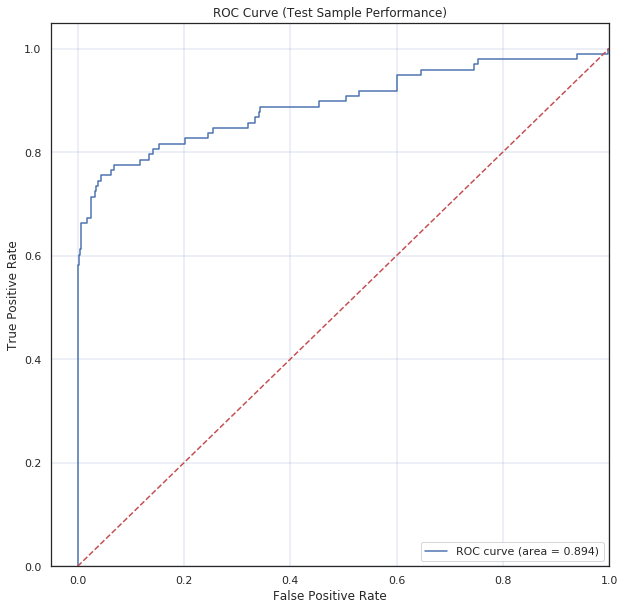

In [73]:
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, log_model.predict_proba(x_test)[:,1])

# Calculate the AUC
roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )

# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.show()

<div class="alert alert-block alert-success">
<font color=blue>

### 7. Prediction with new data

</font>
</div>

<div class="alert alert-block alert-success">
<font color=blue>

### 8. Conclusion

</font>
</div>

<div class="alert alert-block alert-success">
<font color=blue>

### References

</font>
</div>

- https://www.kaggle.com/mlg-ulb/creditcardfraud
- https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
- https://www.kaggle.com/aniruddhachoudhury/credit-card-fraud-detection-99-accuracy/notebook